In [13]:
import tensorflow 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

####### The cifar10 dataset contains 60,000 color images in 10 classes,with 60000 images in each class The dataset is divided into 50000 training images and 10000 testing images. The classes are matually exclusive and  there is no overlap between them.

In [14]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
# Normalize pixel values between  0 to 1
train_images, test_images = train_images/255.0,test_images/255.0

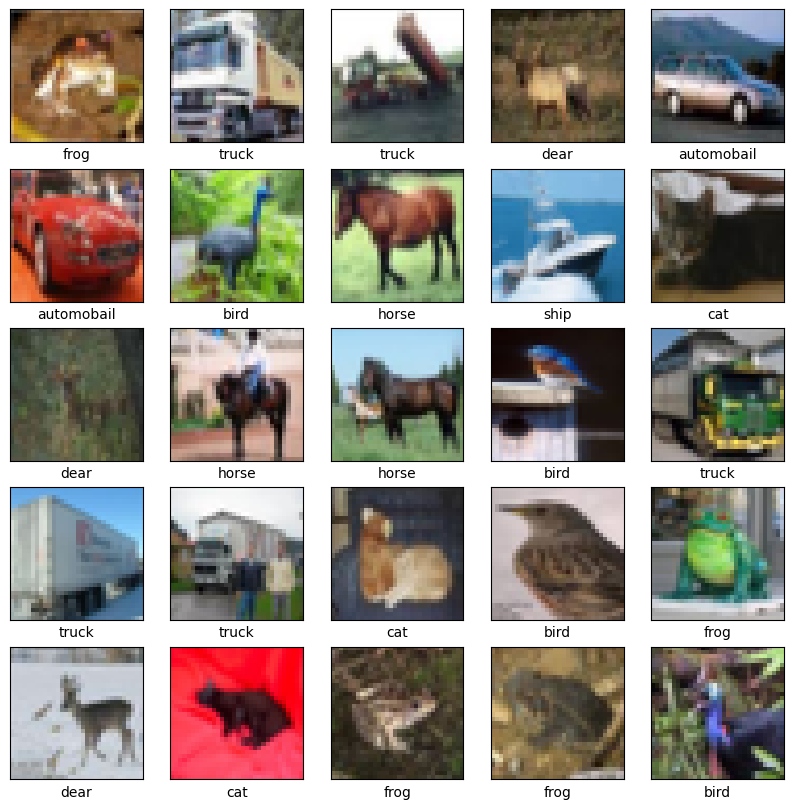

In [15]:
class_names =['airplane','automobail','bird','cat','dear','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [16]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D

In [28]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32 ,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))




In [29]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10))


In [31]:
model.compile(optimizer='adam', loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits =True), metrics=['accuracy'])


In [32]:
train_model = model.fit(train_images,train_labels,epochs =10,validation_data = (test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3989 - loss: 1.6650 - val_accuracy: 0.5791 - val_loss: 1.2058
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6036 - loss: 1.1333 - val_accuracy: 0.6282 - val_loss: 1.0524
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6599 - loss: 0.9719 - val_accuracy: 0.6686 - val_loss: 0.9525
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7006 - loss: 0.8645 - val_accuracy: 0.6639 - val_loss: 0.9962
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7243 - loss: 0.7923 - val_accuracy: 0.6771 - val_loss: 0.9352
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7472 - loss: 0.7284 - val_accuracy: 0.6976 - val_loss: 0.9014
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7660 - loss: 0.6734 - val_accuracy: 0.6968 - val_loss: 0.8937
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7789 -

In [34]:
train_model.history

{'accuracy': [0.48284000158309937,
  0.6162999868392944,
  0.6669600009918213,
  0.7007399797439575,
  0.7230600118637085,
  0.7454599738121033,
  0.7624800205230713,
  0.7777400016784668,
  0.7927799820899963,
  0.806119978427887],
 'loss': [1.4463845491409302,
  1.0921379327774048,
  0.9550182819366455,
  0.8609871864318848,
  0.7923989295959473,
  0.7329322099685669,
  0.6817766427993774,
  0.63885098695755,
  0.592318058013916,
  0.5569788813591003],
 'val_accuracy': [0.5791000127792358,
  0.6281999945640564,
  0.6686000227928162,
  0.6639000177383423,
  0.6771000027656555,
  0.6976000070571899,
  0.6967999935150146,
  0.7016000151634216,
  0.6859999895095825,
  0.7037000060081482],
 'val_loss': [1.2058333158493042,
  1.0523831844329834,
  0.9525333046913147,
  0.9961576461791992,
  0.9351996779441833,
  0.9014058709144592,
  0.8936882615089417,
  0.9076920747756958,
  0.959141194820404,
  0.9129351377487183]}

313/313 - 1s - 5ms/step - accuracy: 0.7037 - loss: 0.9129


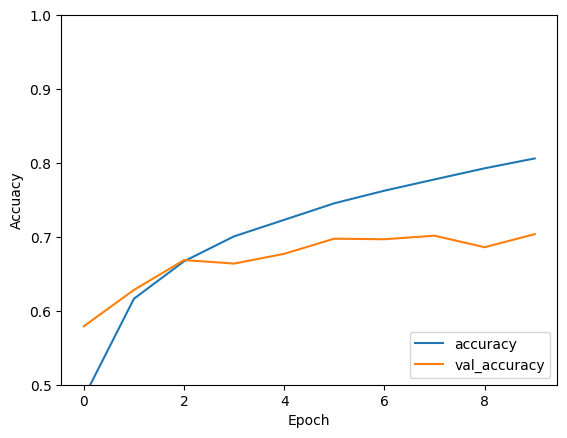

In [38]:
plt.plot(train_model.history['accuracy'],label ='accuracy')
plt.plot(train_model.history['val_accuracy'],label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuacy')
plt.ylim([0.5,1])
plt.legend(loc ='lower right')
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

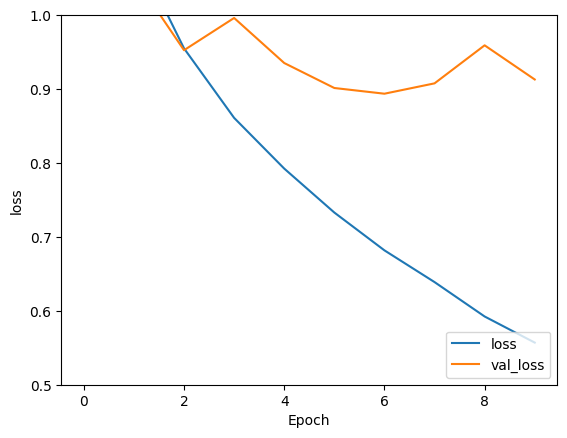

In [36]:
plt.plot(train_model.history['loss'],label ='loss')
plt.plot(train_model.history['val_loss'],label ='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5,1])
plt.legend(loc ='lower right')